## Lectura de datos

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [233]:
archivo = 'registroPrompts.xlsx'
# Leer cada hoja desde la segunda fila
df_gpt = pd.read_excel(archivo, sheet_name='GPT 1', skiprows=1)
df_gpt['modelo'] = 'GPT'

df_copilot = pd.read_excel(archivo, sheet_name='copilot 1', skiprows=1)
df_copilot['modelo'] = 'Copilot'

df_deepseek = pd.read_excel(archivo, sheet_name='seek 1', skiprows=1)
df_deepseek['modelo'] = 'DeepSeek'

df_gpt2 = pd.read_excel(archivo, sheet_name='GPT 2', skiprows=1)
df_gpt2['modelo'] = 'GPT'

df_copilot2 = pd.read_excel(archivo, sheet_name='copilot 2', skiprows=1)
df_copilot2['modelo'] = 'Copilot'

df_deepseek2 = pd.read_excel(archivo, sheet_name='seek 2', skiprows=1)
df_deepseek2['modelo'] = 'DeepSeek'

# dataframe de resultados iniciales de cada modelo con respecto a los prompts
df_generado = pd.concat([df_gpt, df_copilot, df_deepseek], ignore_index=True)

# dataframe de resultados de correciones realizadas por cada modelo con respecto a resultados iniciales
df_correccion = pd.concat([df_gpt2, df_copilot2, df_deepseek2], ignore_index=True)


df_generado.head()


,Caso,Lenguaje,CWE ID,OWASP Top 10 (2021),modelo
0,1,Python,CWE-187,A07:2021 - Identification and Authentication F...,GPT
1,1,Python,CWE-200,A01:2021 - Broken Access Control,GPT
2,1,Python,CWE-256,A02:2021 - Cryptographic Failures,GPT
3,1,Python,CWE-259,A07:2021 - Identification and Authentication F...,GPT
4,1,Python,CWE-284,A01:2021 - Broken Access Control,GPT


In [234]:
df_correccion.head()


,Caso,Lenguaje,CWE ID,OWASP Top 10 (2021),modelo
0,1,Python,CWE-522,A02:2021 - Cryptographic Failures,GPT
1,1,Python,CWE-798,A07:2021 - Identification and Authentication F...,GPT
2,1,Python,CWE-89,A03:2021 - Injection,GPT
3,1,Python,CWE-285,A01:2021 - Broken Access Control,GPT
4,1,Python,CWE-307,A07:2021 - Identification and Authentication F...,GPT


## Analisis base

In [235]:
df_generado['fase'] = 'inicial'
df_correccion['fase'] = 'correccion'

df_combinado = pd.concat([df_generado, df_correccion], ignore_index=True)

In [236]:
vuln_lenguaje_modelo = df_generado.groupby(['Lenguaje', 'modelo']).size().unstack(fill_value=0)
print(vuln_lenguaje_modelo)


modelo    Copilot  DeepSeek  GPT
Lenguaje                        
C              88       136   79
Python         76       141   83


In [237]:
print("Inicial:", len(df_generado))
print("Después de corrección:", len(df_correccion))


Inicial: 603
Después de corrección: 410


In [238]:
reducidas = len(df_generado) - len(df_correccion)
porcentaje = (reducidas / len(df_generado)) * 100

print(f"Vulnerabilidades eliminadas: {reducidas}")
print(f"Reducción porcentual: {porcentaje:.2f}%")


Vulnerabilidades eliminadas: 193
Reducción porcentual: 32.01%


In [239]:
lenguaje_fase = df_combinado.groupby(['Lenguaje', 'fase']).size().unstack(fill_value=0)
lenguaje_fase['reducido'] = lenguaje_fase['inicial'] - lenguaje_fase['correccion']
lenguaje_fase['% reducción'] = (lenguaje_fase['reducido'] / lenguaje_fase['inicial']) * 100
print(lenguaje_fase)


fase      correccion  inicial  reducido  % reducción
Lenguaje                                            
C                212      303        91    30.033003
Python           198      300       102    34.000000


In [240]:
modelo_fase = df_combinado.groupby(['modelo', 'fase']).size().unstack(fill_value=0)
modelo_fase['reducido'] = modelo_fase['inicial'] - modelo_fase['correccion']
modelo_fase['% reducción'] = (modelo_fase['reducido'] / modelo_fase['inicial']) * 100
print(modelo_fase)

fase      correccion  inicial  reducido  % reducción
modelo                                              
Copilot          142      164        22    13.414634
DeepSeek         147      277       130    46.931408
GPT              121      162        41    25.308642


In [241]:
vuln_promedio = df_generado.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()
print(vuln_promedio)


modelo
Copilot     5.466667
DeepSeek    9.233333
GPT         5.400000
dtype: float64


In [242]:
vuln_promedio2 = df_correccion.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()
print(vuln_promedio2)

modelo
Copilot     4.733333
DeepSeek    4.900000
GPT         4.033333
dtype: float64


In [243]:
cwe_antes = set(df_generado['CWE ID'])
cwe_despues = set(df_correccion['CWE ID'])

comunes = cwe_antes & cwe_despues
nuevas = cwe_despues - cwe_antes
eliminadas = cwe_antes - cwe_despues

print("CWEs persistentes:", comunes)
print("CWEs nuevas tras corrección:", nuevas)
print("CWEs eliminadas:", eliminadas)


CWEs persistentes: {'CWE-16', 'CWE-20', 'CWE-367', 'CWE-345', 'CWE-125', 'CWE-89', 'CWE-538', 'CWE-269', 'CWE-248', 'CWE-307', 'CWE-918', 'CWE-404', 'CWE-502', 'CWE-134', 'CWE-79', 'CWE-285', 'CWE-295', 'CWE-74', 'CWE-601', 'CWE-330', 'CWE-170', 'CWE-863', 'CWE-126', 'CWE-614', 'CWE-311', 'CWE-377', 'CWE-400', 'CWE-190', 'CWE-200', 'CWE-703', 'CWE-388', 'CWE-321', 'CWE-693', 'CWE-280', 'CWE-798', 'CWE-259', 'CWE-327', 'CWE-287', 'CWE-778', 'CWE-117', 'CWE-434', 'CWE-306', 'CWE-276', 'CWE-776', 'CWE-662', 'CWE-704', 'CWE-359', 'CWE-209', 'CWE-613', 'CWE-532', 'CWE-319', 'CWE-22', 'CWE-94', 'CWE-521', 'CWE-787', 'CWE-862', 'CWE-770', 'CWE-1104', 'CWE-489', 'CWE-119', 'CWE-522', 'CWE-829', 'CWE-401', 'CWE-732', 'CWE-120', 'CWE-116', 'CWE-362', 'CWE-78', 'CWE-676', 'CWE-73', 'CWE-352', 'CWE-326'}
CWEs nuevas tras corrección: {'CWE-308', 'CWE-384', 'CWE-1284', 'CWE-1021', 'CWE-315', 'CWE-775', 'CWE-664', 'CWE-525', 'CWE-749', 'Corrección completa', 'CWE-320', 'CWE-358', 'CWE-347', 'CWE-785'

In [244]:
lenguajes = df_combinado['Lenguaje'].unique()

for lengua in lenguajes:
    cwe_inicial = set(df_generado[df_generado['Lenguaje'] == lengua]['CWE ID'])
    cwe_corr = set(df_correccion[df_correccion['Lenguaje'] == lengua]['CWE ID'])

    print(f"\nlengua: {lengua}")
    print("  Persistentes:", cwe_inicial & cwe_corr)
    print("  Corregidas:", cwe_inicial - cwe_corr)
    print("  Nuevas:", cwe_corr - cwe_inicial)




lengua: Python
  Persistentes: {'CWE-16', 'CWE-20', 'CWE-345', 'CWE-89', 'CWE-538', 'CWE-269', 'CWE-248', 'CWE-307', 'CWE-918', 'CWE-502', 'CWE-79', 'CWE-285', 'CWE-295', 'CWE-601', 'CWE-330', 'CWE-311', 'CWE-200', 'CWE-400', 'CWE-703', 'CWE-388', 'CWE-321', 'CWE-327', 'CWE-798', 'CWE-287', 'CWE-778', 'CWE-259', 'CWE-434', 'CWE-306', 'CWE-662', 'CWE-776', 'CWE-704', 'CWE-359', 'CWE-209', 'CWE-532', 'CWE-319', 'CWE-22', 'CWE-521', 'CWE-489', 'CWE-522', 'CWE-829', 'CWE-732', 'CWE-116', 'CWE-362', 'CWE-78', 'CWE-73', 'CWE-352'}
  Corregidas: {'CWE-59', 'CWE-367', 'CWE-125', 'CWE-667', 'CWE-476', 'CWE-284', 'CWE-134', 'CWE-77', 'CWE-933', 'CWE-147', 'CWE-242', 'CWE-754', 'CWE-412', 'CWE-126', 'CWE-614', 'CWE-863', 'CWE-190', 'CWE-256', 'CWE-215', 'CWE-280', 'CWE-391', 'CWE-322', 'CWE-454', 'CWE-187', 'CWE-276', 'CWE-922', 'CWE-312', 'CWE-787', 'CWE-119', 'CWE-611', 'CWE-1333', 'CWE-120', 'CWE-1004', 'CWE-250', 'CWE-676'}
  Nuevas: {'CWE-308', 'CWE-1284', 'CWE-1021', 'CWE-315', 'CWE-664', 

In [245]:
modelos = df_combinado['modelo'].unique()

for modelo in modelos:
    cwe_inicial = set(df_generado[df_generado['modelo'] == modelo]['CWE ID'])
    cwe_corr = set(df_correccion[df_correccion['modelo'] == modelo]['CWE ID'])

    print(f"\nModelo: {modelo}")
    print("  Persistentes:", cwe_inicial & cwe_corr)
    print("  Corregidas:", cwe_inicial - cwe_corr)
    print("  Nuevas:", cwe_corr - cwe_inicial)



Modelo: GPT
  Persistentes: {'CWE-20', 'CWE-89', 'CWE-269', 'CWE-502', 'CWE-134', 'CWE-285', 'CWE-295', 'CWE-126', 'CWE-200', 'CWE-614', 'CWE-400', 'CWE-703', 'CWE-327', 'CWE-798', 'CWE-287', 'CWE-778', 'CWE-259', 'CWE-117', 'CWE-434', 'CWE-276', 'CWE-662', 'CWE-209', 'CWE-319', 'CWE-22', 'CWE-119', 'CWE-522', 'CWE-732', 'CWE-120', 'CWE-362', 'CWE-78', 'CWE-306', 'CWE-352'}
  Corregidas: {'CWE-248', 'CWE-918', 'CWE-476', 'CWE-404', 'CWE-284', 'CWE-772', 'CWE-79', 'CWE-933', 'CWE-601', 'CWE-754', 'CWE-863', 'CWE-252', 'CWE-256', 'CWE-215', 'CWE-187', 'CWE-776', 'CWE-922', 'CWE-532', 'CWE-611', 'CWE-1004', 'CWE-250', 'CWE-676', 'CWE-73'}
  Nuevas: {'CWE-489', 'CWE-330', 'CWE-367', 'CWE-384', 'CWE-916', 'CWE-311', 'CWE-1284', 'CWE-326', 'CWE-307', 'CWE-785', 'CWE-521', 'CWE-358', 'CWE-280', 'CWE-775'}

Modelo: Copilot
  Persistentes: {'CWE-20', 'CWE-345', 'CWE-538', 'CWE-248', 'CWE-918', 'CWE-404', 'CWE-134', 'CWE-79', 'CWE-285', 'CWE-74', 'CWE-601', 'CWE-126', 'CWE-200', 'CWE-311', 'CWE

In [246]:
gpt_cwe = set(df_combinado[df_combinado['modelo'] == 'GPT']['CWE ID'])
copilot_cwe = set(df_combinado[df_combinado['modelo'] == 'Copilot']['CWE ID'])
deepseek_cwe = set(df_combinado[df_combinado['modelo'] == 'DeepSeek']['CWE ID'])

comunes = gpt_cwe & copilot_cwe & deepseek_cwe
solo_gpt = gpt_cwe - (copilot_cwe | deepseek_cwe)
solo_copilot = copilot_cwe - (gpt_cwe | deepseek_cwe)
solo_deepseek = deepseek_cwe - (gpt_cwe | copilot_cwe)

print("CWEs comunes:", comunes)
print("CWEs solo GPT:", solo_gpt)
print("CWEs solo Copilot:", solo_copilot)
print("CWEs solo DeepSeek:", solo_deepseek)


CWEs comunes: {'CWE-20', 'CWE-89', 'CWE-307', 'CWE-918', 'CWE-502', 'CWE-134', 'CWE-73', 'CWE-79', 'CWE-285', 'CWE-295', 'CWE-126', 'CWE-200', 'CWE-311', 'CWE-400', 'CWE-703', 'CWE-256', 'CWE-327', 'CWE-798', 'CWE-287', 'CWE-778', 'CWE-434', 'CWE-306', 'CWE-209', 'CWE-532', 'CWE-22', 'CWE-319', 'CWE-489', 'CWE-119', 'CWE-522', 'CWE-120', 'CWE-362', 'CWE-78', 'CWE-676', 'CWE-259', 'CWE-352', 'CWE-326'}
CWEs solo GPT: {'CWE-187', 'CWE-384', 'CWE-611', 'CWE-1284', 'CWE-252', 'CWE-772', 'CWE-250', 'CWE-358', 'CWE-933', 'CWE-775'}
CWEs solo Copilot: {'CWE-59', 'CWE-74', 'CWE-829', 'CWE-538', 'CWE-704', 'CWE-667', 'CWE-388', 'CWE-321', 'CWE-116', 'CWE-77', 'CWE-937', 'CWE-664'}
CWEs solo DeepSeek: {'CWE-16', 'CWE-308', 'CWE-1275', 'CWE-125', 'CWE-1021', 'CWE-315', 'CWE-147', 'CWE-525', 'CWE-242', 'CWE-170', 'CWE-749', 'CWE-412', 'Corrección completa', 'CWE-377', 'CWE-320', 'CWE-693', 'CWE-391', 'CWE-322', 'CWE-454', 'CWE-347', 'CWE-338', 'CWE-613', 'CWE-201', 'CWE-787', 'CWE-862', 'CWE-316',

In [247]:
owasp_antes = set(df_generado['OWASP Top 10 (2021)'])
owasp_despues = set(df_correccion['OWASP Top 10 (2021)'])

owasp_persistentes = owasp_antes & owasp_despues
owasp_nuevas = owasp_despues - owasp_antes
owasp_eliminadas = owasp_antes - owasp_despues

print("Categorías OWASP persistentes:", owasp_persistentes)
print("Nuevas tras corrección:", owasp_nuevas)
print("Eliminadas:", owasp_eliminadas)


Categorías OWASP persistentes: {'A02:2021 - Cryptographic Failures', 'A05:2021 - Security Misconfiguration', 'A10:2021 - Server-Side Request Forgery', 'A04:2021 - Insecure Design', 'A03:2021 - Injection', 'A09:2021 - Security Logging and Monitoring Failures', 'A08:2021 - Software and Data Integrity Failures', 'A07:2021 - Identification and Authentication Failures', 'A01:2021 - Broken Access Control', 'A06:2021 - Vulnerable and Outdated Components'}
Nuevas tras corrección: {'Corrección completa'}
Eliminadas: set()


In [248]:
owasp_modelo_fase = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().unstack(fill_value=0)
(owasp_modelo_fase)


OWASP Top 10 (2021)  A01:2021 - Broken Access Control  \
modelo   fase                                           
Copilot  correccion                                23   
         inicial                                   33   
DeepSeek correccion                                32   
         inicial                                   60   
GPT      correccion                                22   
         inicial                                   50   

OWASP Top 10 (2021)  A02:2021 - Cryptographic Failures  A03:2021 - Injection  \
modelo   fase                                                                  
Copilot  correccion                                 14                    10   
         inicial                                    18                    15   
DeepSeek correccion                                 15                     8   
         inicial                                    29                    26   
GPT      correccion                                 19                     6   
         inicial                                    18                    12   

OWASP Top 10 (2021)  A04:2021 - Insecure Design  \
modelo   fase                                     
Copilot  correccion                          42   
         inicial                             38   
DeepSeek correccion                          45   
         inicial                             72   
GPT      correccion                          34   
         inicial                             32   

OWASP Top 10 (2021)  A05:2021 - Security Misconfiguration  \
modelo   fase                                               
Copilot  correccion                                    24   
         inicial                                       29   
DeepSeek correccion                                    22   
         inicial                                       48   
GPT      correccion                                    19   
         inicial                                       23   

OWASP Top 10 (2021)  A06:2021 - Vulnerable and Outdated Components  \
modelo   fase                                                        
Copilot  correccion                                              0   
         inicial                                                 0   
DeepSeek correccion                                              1   
         inicial                                                 1   
GPT      correccion                                              0   
         inicial                                                 3   

OWASP Top 10 (2021)  A07:2021 - Identification and Authentication Failures  \
modelo   fase                                                                
Copilot  correccion                                                  7       
         inicial                                                    11       
DeepSeek correccion                                                 15       
         inicial                                                    24       
GPT      correccion                                                 11       
         inicial                                                     8       

OWASP Top 10 (2021)  A08:2021 - Software and Data Integrity Failures  \
modelo   fase                                                          
Copilot  correccion                                                5   
         inicial                                                   9   
DeepSeek correccion                                                2   
         inicial                                                   7   
GPT      correccion                                                1   
         inicial                                                   2   

OWASP Top 10 (2021)  A09:2021 - Security Logging and Monitoring Failures  \
modelo   fase                                                              
Copilot  correccion                                                 12     
         inic

In [249]:
cwe_distribucion = df_generado.groupby(['modelo', 'CWE ID']).size().unstack(fill_value=0)
cwe_distribucion


CWE ID,CWE-1004,CWE-1104,CWE-116,CWE-117,CWE-119,CWE-120,CWE-125,CWE-126,CWE-1275,CWE-1333,...,CWE-79,CWE-798,CWE-829,CWE-862,CWE-863,CWE-89,CWE-918,CWE-922,CWE-933,CWE-94
modelo,,,,,,,,,,,,,,,,,,,,,
Copilot,0,0,1,1,10,15,0,5,0,0,...,2,3,1,0,0,6,1,0,0,0
DeepSeek,1,1,0,0,13,20,2,6,1,1,...,4,9,0,1,1,9,0,1,0,1
GPT,1,0,0,1,12,10,0,3,0,0,...,1,3,0,0,1,5,1,2,1,0


In [250]:
cwe_distribucion = df_generado.groupby(['Lenguaje', 'CWE ID']).size().unstack(fill_value=0)
cwe_distribucion


CWE ID,CWE-1004,CWE-1104,CWE-116,CWE-117,CWE-119,CWE-120,CWE-125,CWE-126,CWE-1275,CWE-1333,...,CWE-79,CWE-798,CWE-829,CWE-862,CWE-863,CWE-89,CWE-918,CWE-922,CWE-933,CWE-94
Lenguaje,,,,,,,,,,,,,,,,,,,,,
C,1,1,0,2,27,32,1,12,1,0,...,3,4,0,1,1,11,1,1,0,1
Python,1,0,1,0,8,13,1,2,0,1,...,4,11,1,0,1,9,1,2,1,0


In [251]:
    top_cwe_modelo = df_combinado.groupby('CWE ID').size().reset_index(name='Frecuencia')
    top10 = top_cwe_modelo.head(10)
    top10 = top10.sort_values(by='Frecuencia', ascending=False)
    top10.head(10)

,CWE ID,Frecuencia
6,CWE-120,80
5,CWE-119,66
8,CWE-126,36
4,CWE-117,6
7,CWE-125,3
0,CWE-1004,2
2,CWE-1104,2
3,CWE-116,2
1,CWE-1021,1
9,CWE-1275,1


In [252]:
    top_cwe_modelo = df_combinado.groupby('OWASP Top 10 (2021)').size().reset_index(name='Frecuencia')
    top10 = top_cwe_modelo.head(10)
    top10 = top10.sort_values(by='Frecuencia', ascending=False)
    top10.head(12)

,OWASP Top 10 (2021),Frecuencia
3,A04:2021 - Insecure Design,263
0,A01:2021 - Broken Access Control,220
4,A05:2021 - Security Misconfiguration,165
1,A02:2021 - Cryptographic Failures,113
2,A03:2021 - Injection,77
6,A07:2021 - Identification and Authentication F...,76
8,A09:2021 - Security Logging and Monitoring Fai...,48
7,A08:2021 - Software and Data Integrity Failures,26
9,A10:2021 - Server-Side Request Forgery,19
5,A06:2021 - Vulnerable and Outdated Components,5


In [253]:
    top_cwe_modelo = df_combinado.groupby(['modelo', 'CWE ID']).size().reset_index(name='Frecuencia')
    top10 = top_cwe_modelo.groupby('modelo').apply(lambda x: x.sort_values('Frecuencia', ascending=False).head(10))
    (top10.reset_index(drop=True))


C:\Users\Josue\AppData\Local\Temp\ipykernel_18640\3064418682.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10 = top_cwe_modelo.groupby('modelo').apply(lambda x: x.sort_values('Frecuencia', ascending=False).head(10))


,modelo,CWE ID,Frecuencia
0,Copilot,CWE-20,32
1,Copilot,CWE-120,28
2,Copilot,CWE-119,23
3,Copilot,CWE-362,20
4,Copilot,CWE-126,13
5,Copilot,CWE-22,9
6,Copilot,CWE-319,8
7,Copilot,CWE-78,8
8,Copilot,CWE-522,8
9,Copilot,CWE-306,7


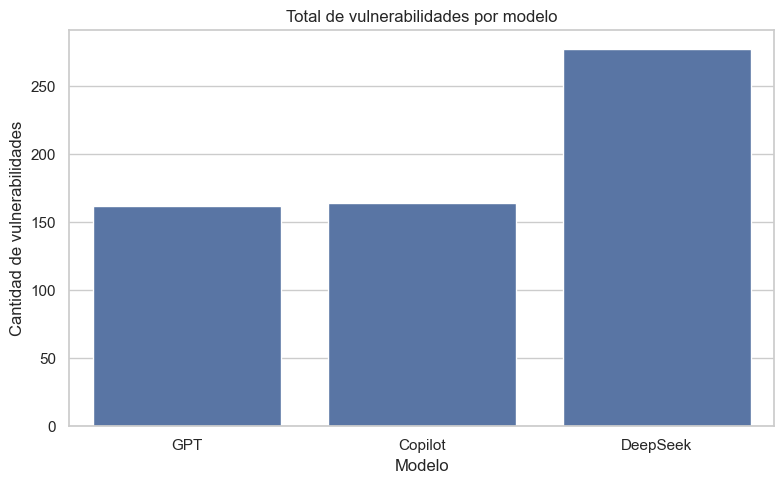

In [254]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_generado, x='modelo')
plt.title("Total de vulnerabilidades por modelo")
plt.xlabel("Modelo")
plt.ylabel("Cantidad de vulnerabilidades")
plt.tight_layout()
plt.show()


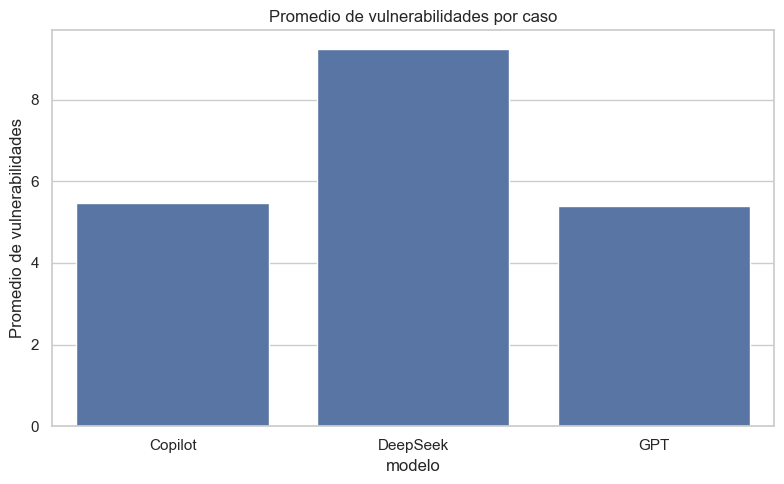

In [255]:
vuln_por_caso = df_generado.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()

# Convertir a DataFrame para graficar
vuln_por_caso_df = vuln_por_caso.reset_index(name='Promedio')

plt.figure(figsize=(8, 5))
sns.barplot(data=vuln_por_caso_df, x='modelo', y='Promedio')
plt.title("Promedio de vulnerabilidades por caso")
plt.ylabel("Promedio de vulnerabilidades")
plt.tight_layout()
plt.show()

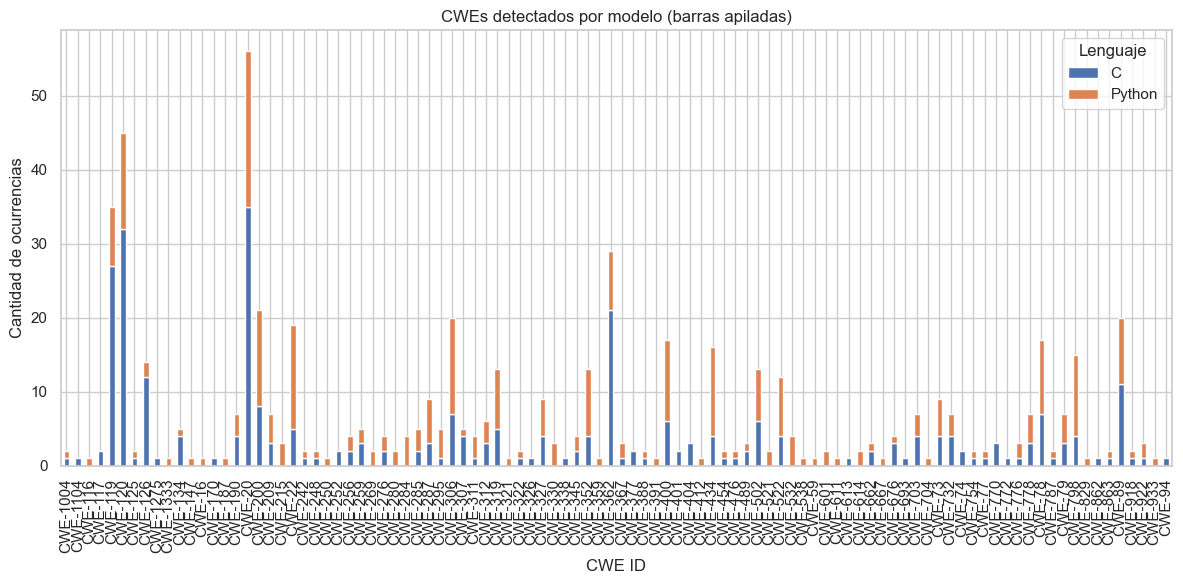

In [256]:
cwe_distribucion.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("CWEs detectados por modelo (barras apiladas)")
plt.ylabel("Cantidad de ocurrencias")
plt.xlabel("CWE ID")
plt.tight_layout()
plt.show()


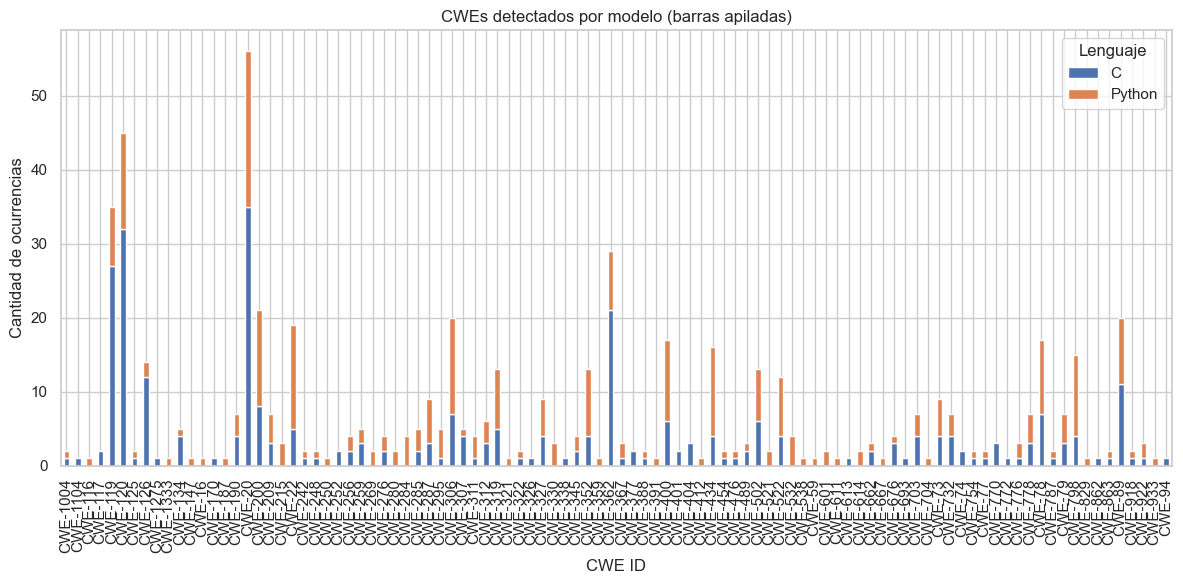

In [257]:
cwe_distribucion.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("CWEs detectados por modelo (barras apiladas)")
plt.ylabel("Cantidad de ocurrencias")
plt.xlabel("CWE ID")
plt.tight_layout()
plt.show()

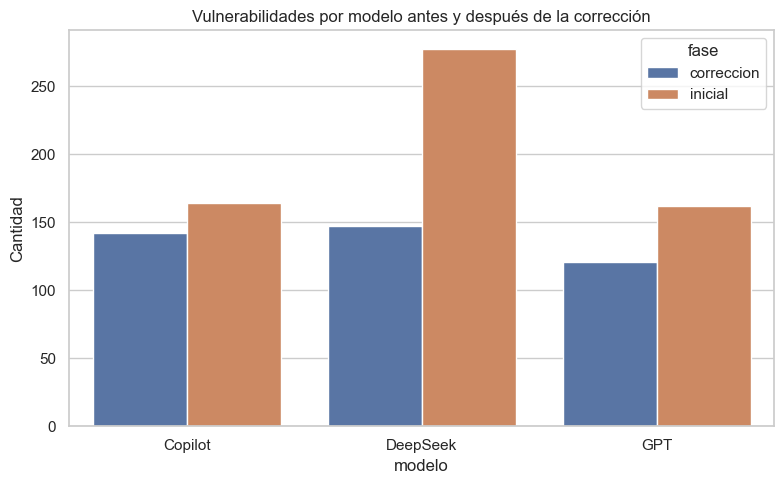

In [258]:
modelo_fase = df_combinado.groupby(['modelo', 'fase']).size().reset_index(name='conteo')

plt.figure(figsize=(8, 5))
sns.barplot(data=modelo_fase, x='modelo', y='conteo', hue='fase')
plt.title('Vulnerabilidades por modelo antes y después de la corrección')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


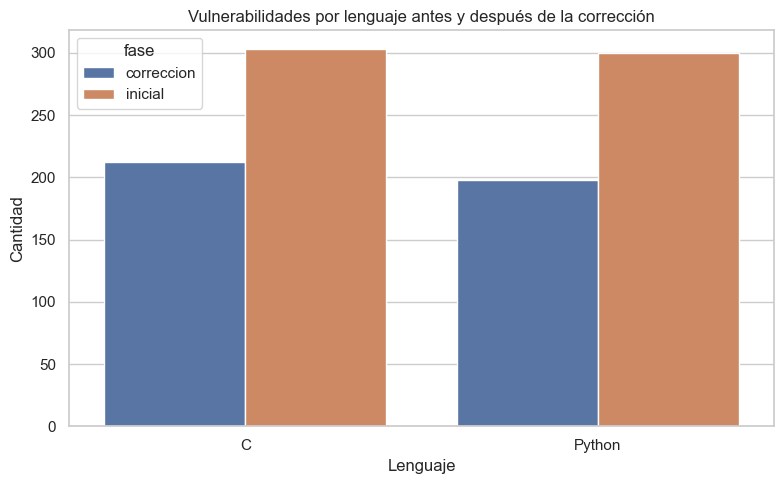

In [259]:
lenguaje_fase = df_combinado.groupby(['Lenguaje', 'fase']).size().reset_index(name='conteo')

plt.figure(figsize=(8, 5))
sns.barplot(data=lenguaje_fase, x='Lenguaje', y='conteo', hue='fase')
plt.title('Vulnerabilidades por lenguaje antes y después de la corrección')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


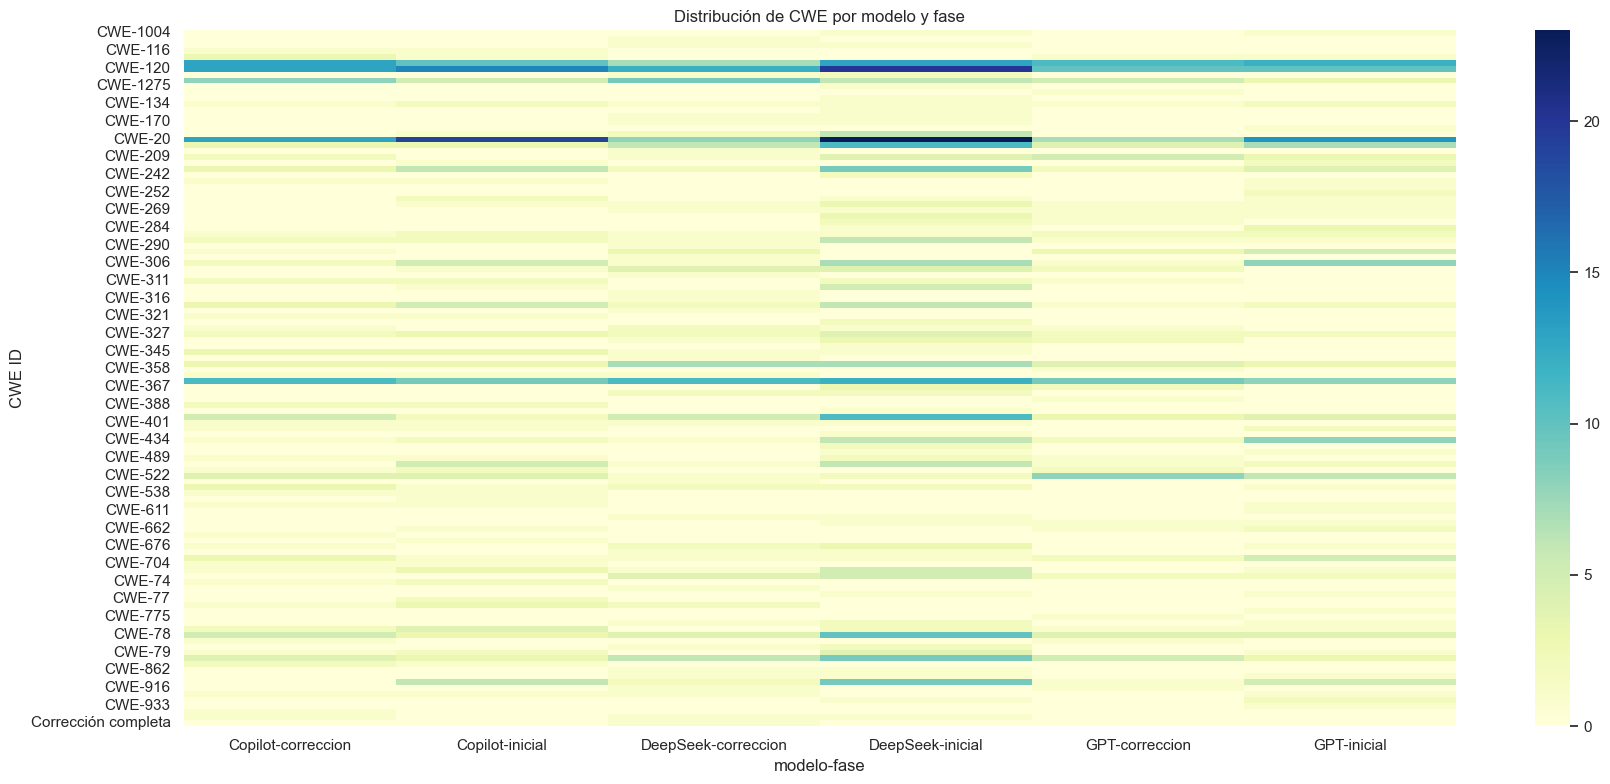

In [260]:
cwe_heatmap = df_combinado.groupby(['modelo', 'fase', 'CWE ID']).size().reset_index(name='conteo')
pivot_cwe = cwe_heatmap.pivot_table(index='CWE ID', columns=['modelo', 'fase'], values='conteo', fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(pivot_cwe, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Distribución de CWE por modelo y fase')
plt.tight_layout()
plt.show()


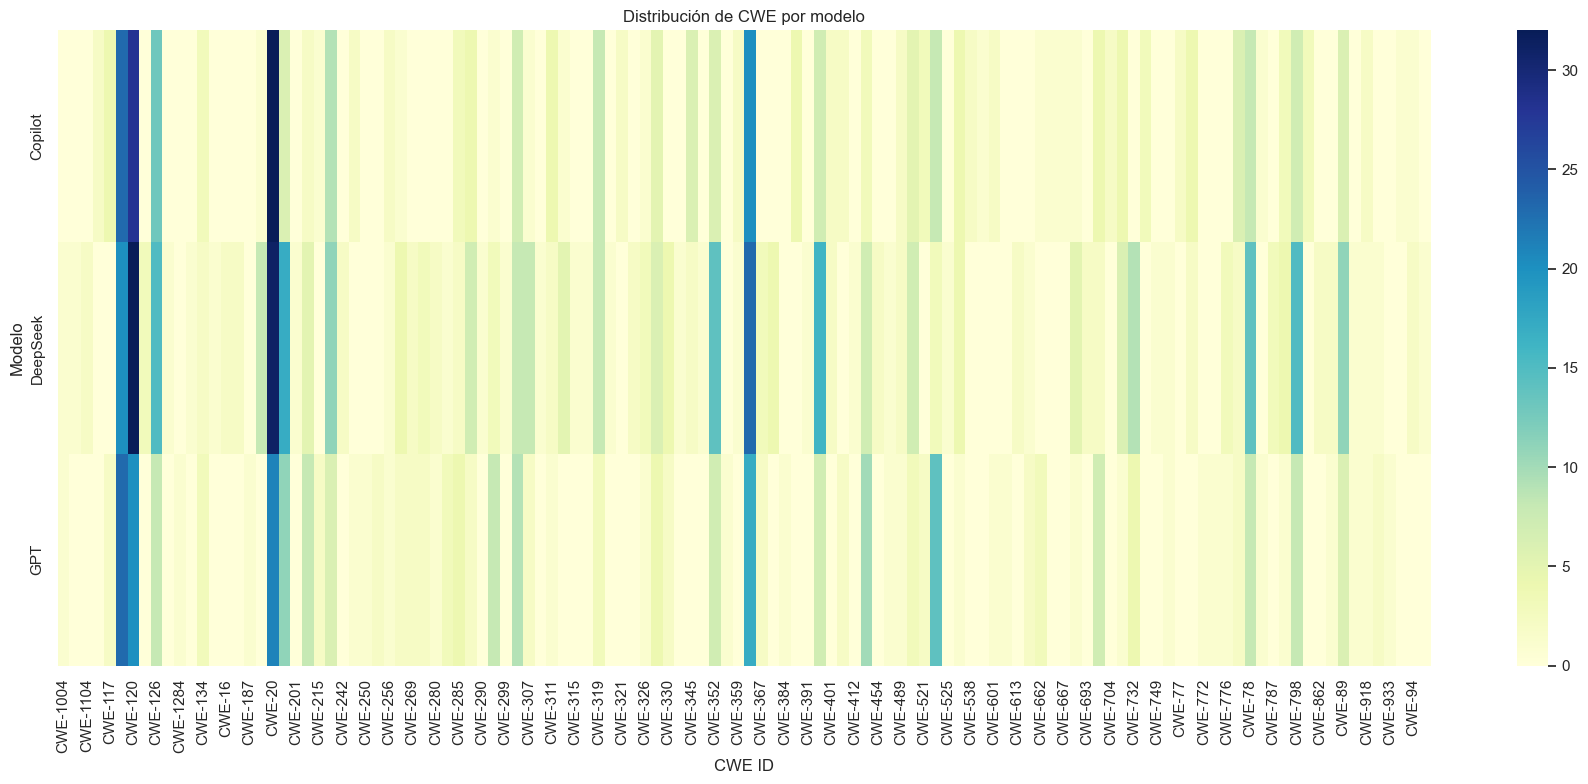

In [261]:
cwe_distribucion = df_combinado.groupby(['modelo', 'CWE ID']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(cwe_distribucion, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Distribución de CWE por modelo")
plt.xlabel("CWE ID")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()


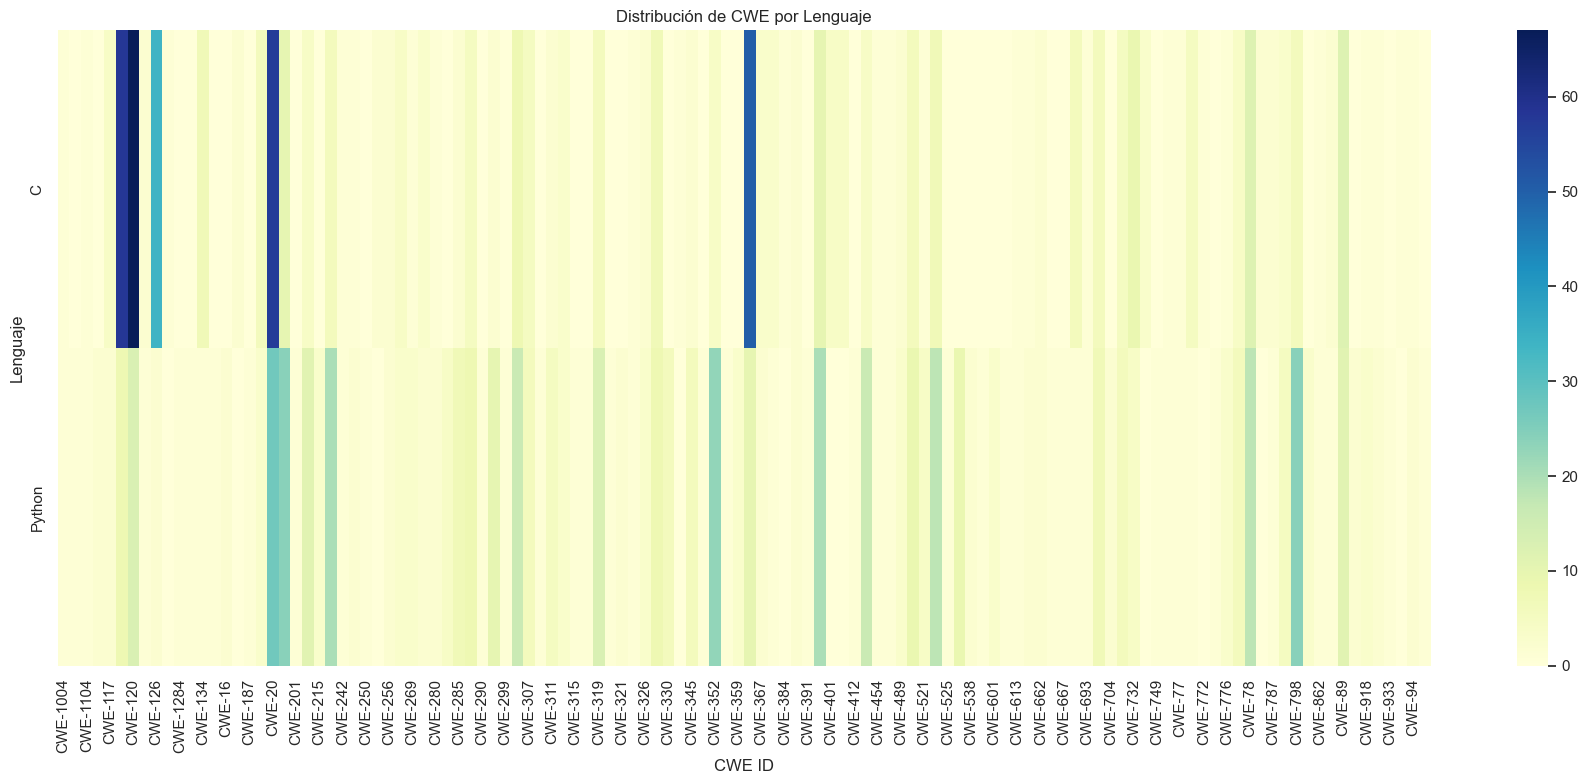

In [262]:
cwe_distribucion = df_combinado.groupby(['Lenguaje', 'CWE ID']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(cwe_distribucion, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Distribución de CWE por Lenguaje")
plt.xlabel("CWE ID")
plt.ylabel("Lenguaje")
plt.tight_layout()
plt.show()


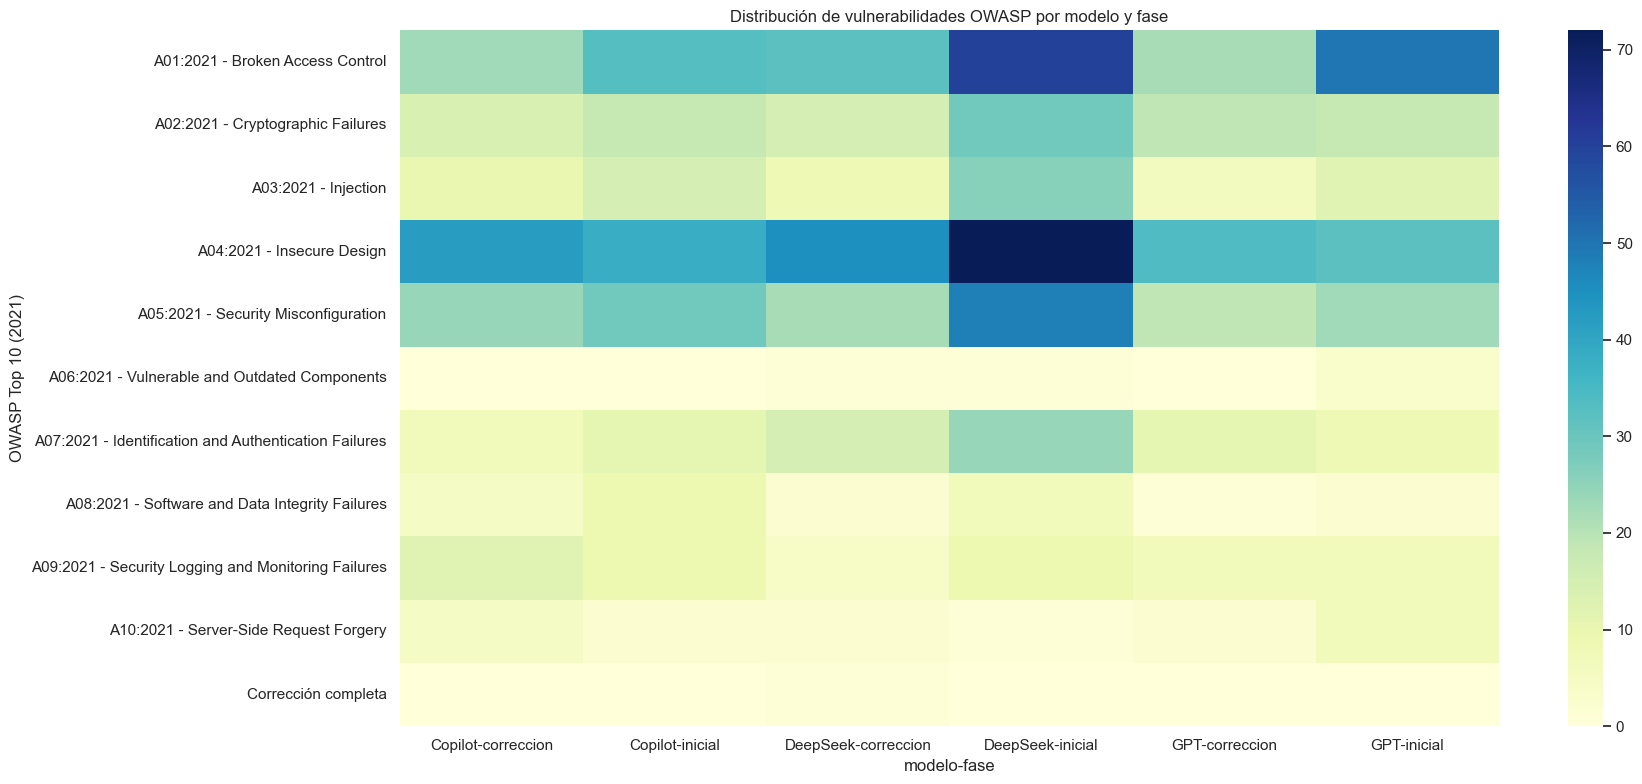

In [263]:
owasp_heatmap = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().reset_index(name='conteo')
pivot_owasp = owasp_heatmap.pivot_table(index='OWASP Top 10 (2021)', columns=['modelo', 'fase'], values='conteo', fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(pivot_owasp, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Distribución de vulnerabilidades OWASP por modelo y fase')
plt.tight_layout()
plt.show()


In [264]:
modelo_lenguaje_fase = df_combinado.groupby(['modelo', 'Lenguaje', 'fase']).size().unstack(fill_value=0)
(modelo_lenguaje_fase)


fase               correccion  inicial
modelo   Lenguaje                     
Copilot  C                 76       88
         Python            66       76
DeepSeek C                 73      136
         Python            74      141
GPT      C                 63       79
         Python            58       83

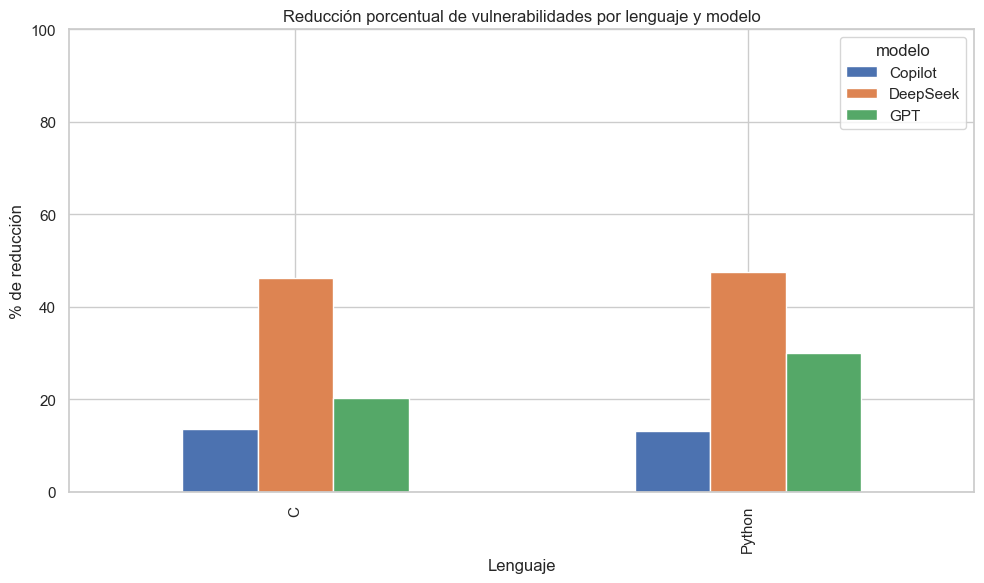

In [265]:
pivot = df_combinado.groupby(['Lenguaje', 'modelo', 'fase']).size().unstack(fill_value=0)
pivot['% reducción'] = ((pivot['inicial'] - pivot['correccion']) / pivot['inicial']) * 100

pivot['% reducción'].unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Reducción porcentual de vulnerabilidades por lenguaje y modelo')
plt.ylabel('% de reducción')
plt.xlabel('Lenguaje')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


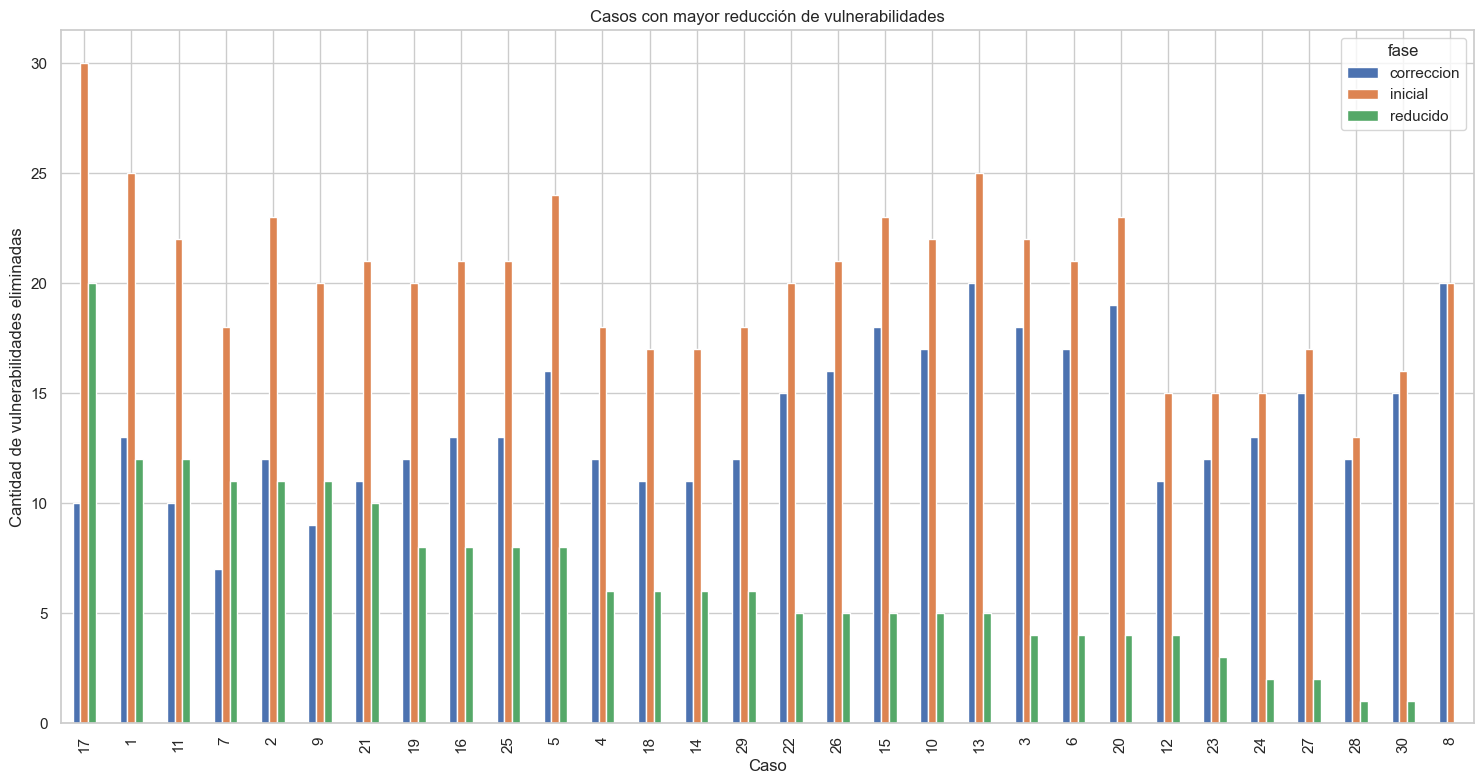

In [266]:
caso_fase = df_combinado.groupby(['Caso', 'fase']).size().unstack(fill_value=0)
caso_fase['reducido'] = caso_fase['inicial'] - caso_fase['correccion']
caso_fase.sort_values('reducido', ascending=False).plot(kind='bar', figsize=(15, 8))
plt.title('Casos con mayor reducción de vulnerabilidades')
plt.ylabel('Cantidad de vulnerabilidades eliminadas')
plt.tight_layout()
plt.show()


In [267]:
reduction_modelo = df_combinado.groupby(['modelo', 'fase']).size().unstack()
reduction_modelo['% reducción'] = ((reduction_modelo['inicial'] - reduction_modelo['correccion']) / reduction_modelo['inicial']) * 100
print(reduction_modelo.sort_values('% reducción', ascending=False))


fase      correccion  inicial  % reducción
modelo                                    
DeepSeek         147      277    46.931408
GPT              121      162    25.308642
Copilot          142      164    13.414634


In [268]:
persistencia_lenguaje = df_combinado.groupby(['Lenguaje', 'fase']).size().unstack()
persistencia_lenguaje['% persistencia'] = (persistencia_lenguaje['correccion'] / persistencia_lenguaje['inicial']) * 100
print(persistencia_lenguaje.sort_values('% persistencia', ascending=False))


fase      correccion  inicial  % persistencia
Lenguaje                                     
C                212      303       69.966997
Python           198      300       66.000000


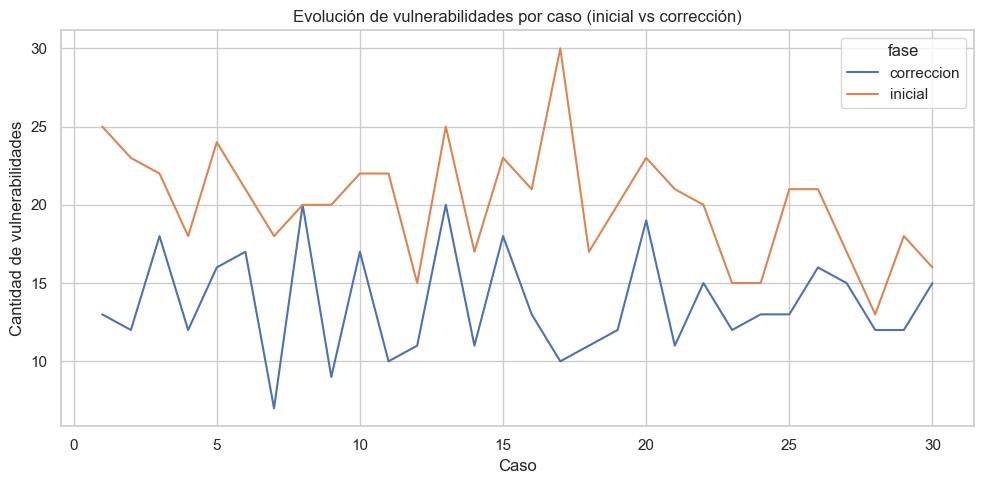

In [269]:
caso_evolucion = df_combinado.groupby(['Caso', 'fase']).size().unstack(fill_value=0)
caso_evolucion.plot(figsize=(10,5))
plt.title("Evolución de vulnerabilidades por caso (inicial vs corrección)")
plt.ylabel("Cantidad de vulnerabilidades")
plt.xlabel("Caso")
plt.grid(True)
plt.tight_layout()
plt.show()


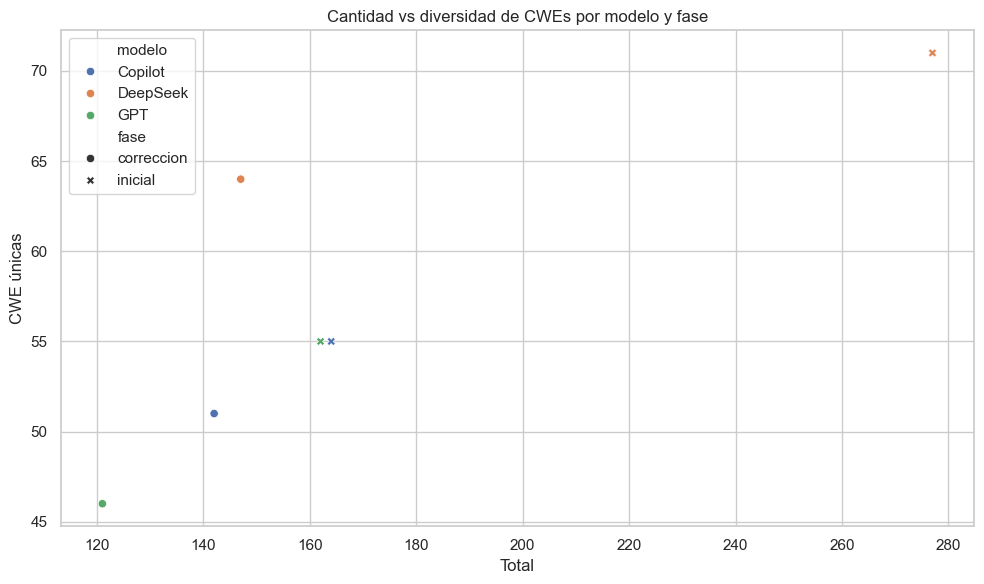

In [270]:
conteo = df_combinado.groupby(['modelo', 'fase']).size()
diversidad = df_combinado.groupby(['modelo', 'fase'])['CWE ID'].nunique()

df_dispersion = pd.concat([conteo, diversidad], axis=1)
df_dispersion.columns = ['Total', 'CWE únicas']

sns.scatterplot(data=df_dispersion.reset_index(), x='Total', y='CWE únicas', hue='modelo', style='fase')
plt.title("Cantidad vs diversidad de CWEs por modelo y fase")
plt.tight_layout()
plt.show()


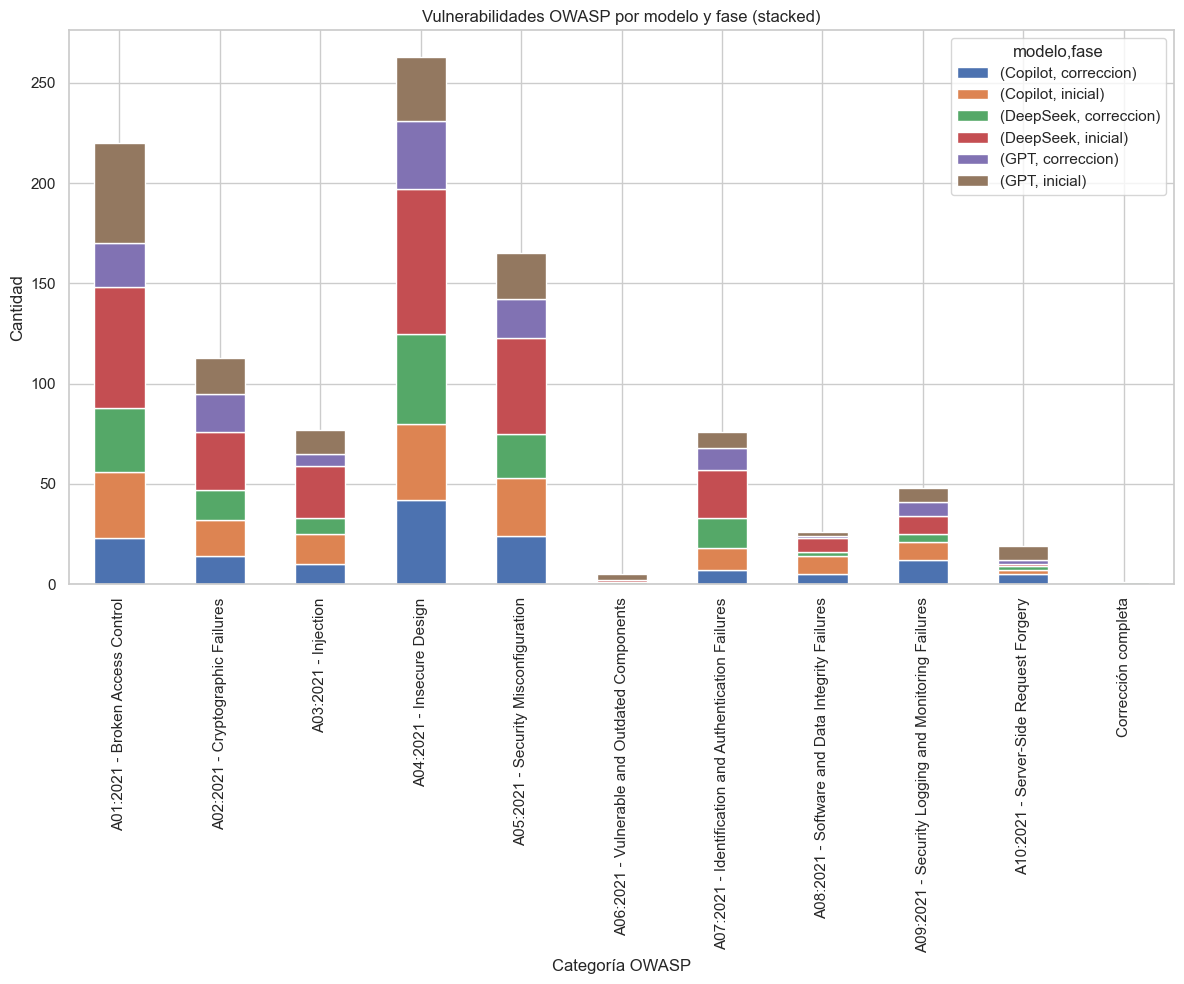

In [271]:
owasp_data = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().unstack(fill_value=0)
owasp_data.T.plot(kind='bar', stacked=True, figsize=(12,10))
plt.title("Vulnerabilidades OWASP por modelo y fase (stacked)")
plt.xlabel("Categoría OWASP")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


Como determino mejor modelos?
a. efectividad, menor cantidad de vulnerabilidades generadas y  capacidad de reduccion de vulnerabilidades
El mejor modelo tiene el % más alto de reducción.
El mejor modelo elimina más tipos distintos de CWE.
El mejor modelo no deberia introducir nuevas vulnerabilidades al corregir.
El mejor modelo tiene buen desempeño en ambos lenguajes.

## 📊 Criterios  compartivos y Cuantitativos (Métricas Objetivas)

1. Menor Cantidad total de vulnerabilidades (CWE) detectadas en la primera generación
     Menor cantidad = mejor modelo en generación inicial segura.

2. Menor Cantidad de vulnerabilidades persistentes tras corrección
    Cuántas vulnerabilidades siguen presentes después de pedir una corrección.

3. Tasa de corrección efectiva (%)
    Más alta = mejor capacidad del modelo para  corregir errores presentes en general
   	Total de vulnerabilidades reportadas
    Ver si el modelo aprendió y dejó de repetir ciertos CWE

4. Tasa de reducción efectiva (%)
    Más alta = mejor capacidad del modelo para automejorarse.
    Número de CWE únicos corregidos
    Ver si disminuyeron los errores en total (aunque sean repetidos)
5. menor cantidad de vulnerabilidades unicas presentes segun modelo

6. Número de vulnerabilidades nuevas introducidas en la fase de corrección
    Idealmente debe ser 0. Si sube, es señal de regresión o sobreajuste inseguro

In [272]:

# Asegúrate de que estas columnas estén en los DataFrames
columnas = ['CWE ID', 'OWASP Top 10 (2021)', 'modelo', 'fase', 'Lenguaje']

# 1 y 2 Total de vulnerabilidades por modelo y fase
def total_vulnerabilidades(df):
    return df.groupby(['modelo', 'fase']).size().reset_index(name='total_vulnerabilidades')

# 5. Vulnerabilidades únicas por modelo y fase
def vulnerabilidades_unicas(df):
    return df.groupby(['modelo', 'fase'])['CWE ID'].nunique().reset_index(name='cwe_unicos')

# 3. Tasa de corrección (%)
def tasa_correccion(df_generado, df_correccion):
    tasas = []
    modelos = df_generado['modelo'].unique()
    for modelo in modelos:
        cwe_ini = set(df_generado[df_generado['modelo'] == modelo]['CWE ID'])
        cwe_corr = set(df_correccion[df_correccion['modelo'] == modelo]['CWE ID'])
        corregidos = cwe_ini - cwe_corr
        tasa = (len(corregidos) / len(cwe_ini)) * 100 if cwe_ini else 0
        tasas.append({'modelo': modelo, 'tasa_correccion(%)': round(tasa, 2)})
    return pd.DataFrame(tasas)

# 6. Vulnerabilidades nuevas introducidas en la corrección
def nuevas_vulnerabilidades(df_generado, df_correccion):
    resultados = []
    for modelo in df_generado['modelo'].unique():
        cwe_ini = set(df_generado[df_generado['modelo'] == modelo]['CWE ID'])
        cwe_corr = set(df_correccion[df_correccion['modelo'] == modelo]['CWE ID'])
        nuevas = cwe_corr - cwe_ini
        resultados.append({'modelo': modelo, 'vulnerabilidades_nuevas': len(nuevas)})
    return pd.DataFrame(resultados)



# Ejecutar análisis
total_vuln = total_vulnerabilidades(df_combinado)
cwe_unicos = vulnerabilidades_unicas(df_combinado)
tasa_corr = tasa_correccion(df_generado, df_correccion)
vuln_nuevas = nuevas_vulnerabilidades(df_generado, df_correccion)




In [273]:

# Configurar estilo
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6)})

# 1. Gráfico de tasa de corrección
def plot_tasa_correccion(tasa_corr):
    sns.barplot(data=tasa_corr, x='modelo', y='tasa_correccion(%)')
    plt.title('Tasa de Corrección por Modelo')
    plt.ylabel('Tasa de Corrección (%)')
    plt.xlabel('Modelo')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# 2. Total de vulnerabilidades por modelo y fase
def plot_total_vulnerabilidades(total_vuln):
    sns.barplot(data=total_vuln, x='modelo', y='total_vulnerabilidades', hue='fase')
    plt.title('Total de Vulnerabilidades por Modelo y Fase')
    plt.ylabel('Cantidad de Vulnerabilidades')
    plt.xlabel('Modelo')
    plt.tight_layout()
    plt.show()
# 3. Vulnerabilidades únicas (CWE ID distintos) por modelo y fase
def plot_vulnerabilidades_unicas(cwe_unicos):
    sns.barplot(data=cwe_unicos, x='modelo', y='cwe_unicos', hue='fase')
    plt.title('Vulnerabilidades Únicas (CWE distintos) por Modelo y Fase')
    plt.ylabel('Cantidad de CWE únicos')
    plt.xlabel('Modelo')
    plt.tight_layout()
    plt.show()

# 4. Vulnerabilidades nuevas introducidas en la corrección
def plot_vulnerabilidades_nuevas(vuln_nuevas):
    sns.barplot(data=vuln_nuevas, x='modelo', y='vulnerabilidades_nuevas')
    plt.title('Vulnerabilidades Nuevas Introducidas tras Corrección')
    plt.ylabel('Cantidad Nueva')
    plt.xlabel('Modelo')
    plt.tight_layout()
    plt.show()

# 1 y 2 Total de vulnerabilidades por modelo y fase

▶ Total de Vulnerabilidades por Modelo y Fase:
     modelo        fase  total_vulnerabilidades
0   Copilot  correccion                     142
1   Copilot     inicial                     164
2  DeepSeek  correccion                     147
3  DeepSeek     inicial                     277
4       GPT  correccion                     121
5       GPT     inicial                     162


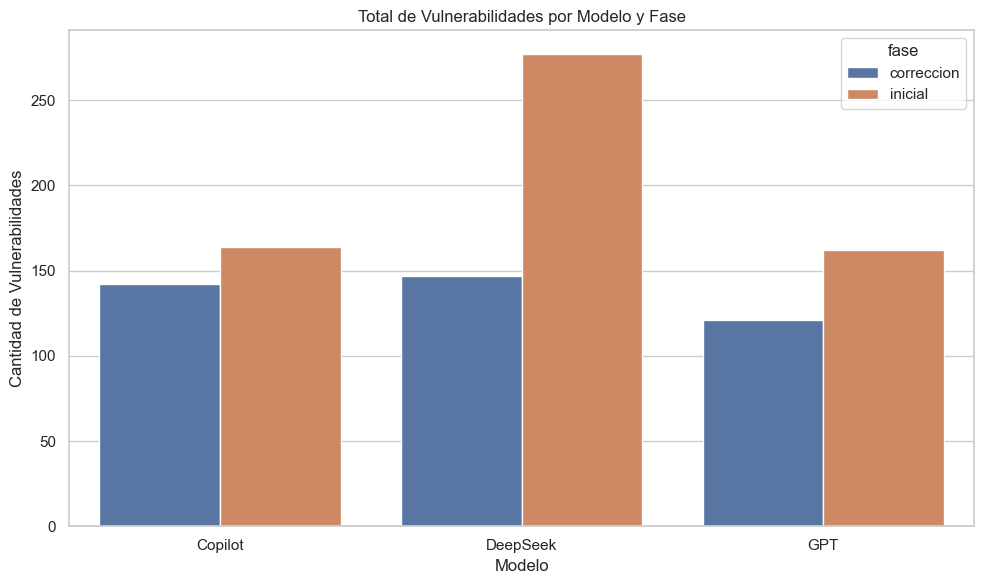

In [274]:
# Mostrar resultados
print("▶ Total de Vulnerabilidades por Modelo y Fase:")
print(total_vuln)
plot_total_vulnerabilidades(total_vuln)


 menos vulnerabilidades persistentes :GPT  correccion                     121
menor cantidad de vulnerabilidades generadas inicialmente :GPT     inicial                     162

# 5. Vulnerabilidades únicas por modelo y fase


▶ CWE Únicos por Modelo y Fase:
     modelo        fase  cwe_unicos
0   Copilot  correccion          51
1   Copilot     inicial          55
2  DeepSeek  correccion          64
3  DeepSeek     inicial          71
4       GPT  correccion          46
5       GPT     inicial          55


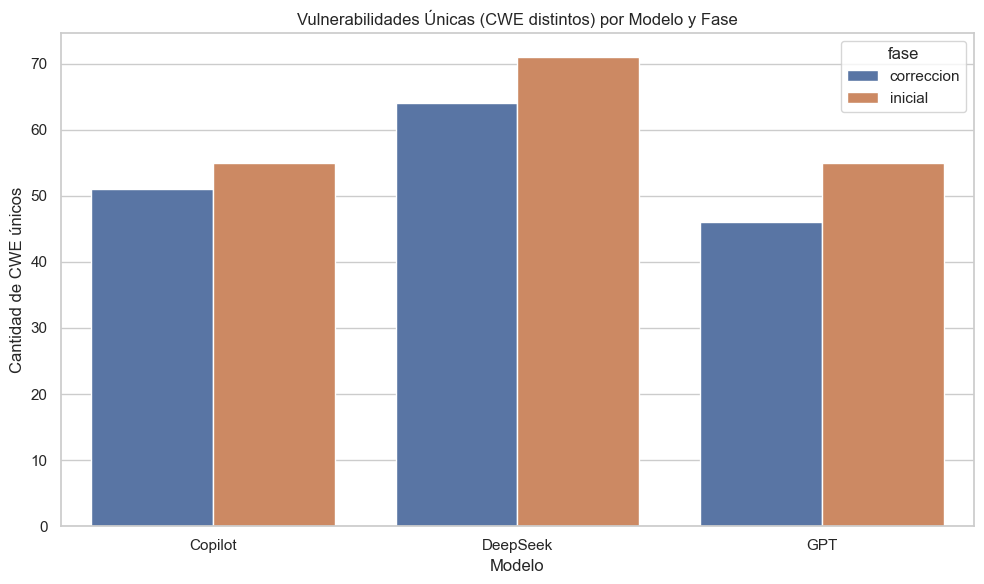

In [275]:

print("\n▶ CWE Únicos por Modelo y Fase:")
print(cwe_unicos)
plot_vulnerabilidades_unicas(cwe_unicos)



gpt presenta menor cantidad de cwe unicos despues de correcion , queda en empate de cantidad de cwe unicos en genracion inicial con copilot

# 3. Tasa de corrección (%)


▶ Tasa de Corrección por Modelo:
     modelo  tasa_correccion(%)
0       GPT               41.82
1   Copilot               21.82
2  DeepSeek               33.80


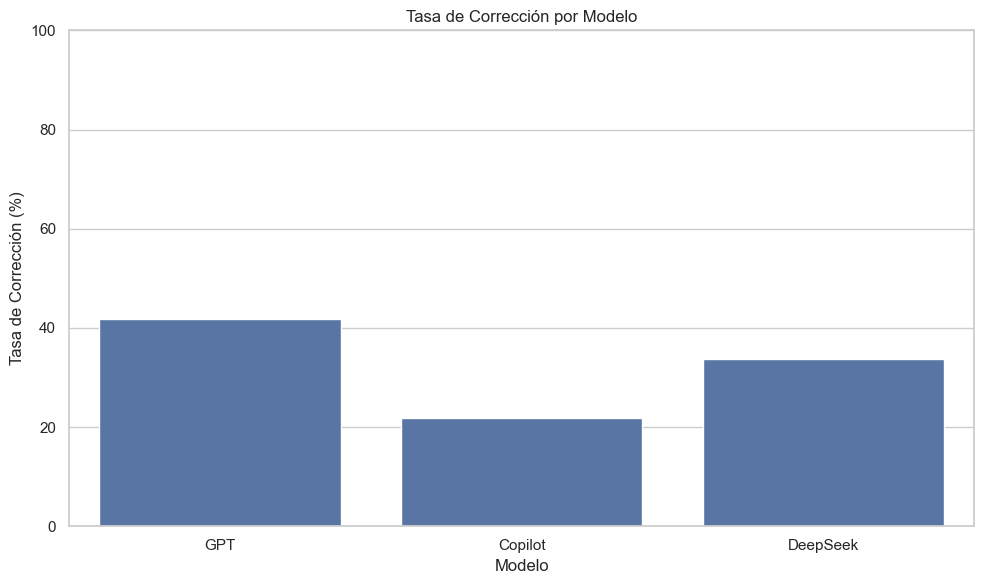

In [276]:
print("\n▶ Tasa de Corrección por Modelo:")
print(tasa_corr)
plot_tasa_correccion(tasa_corr)

 modelo gpt tiene tasa de correccion mayor

# 4. Tasa de reducción (%)

In [280]:
modelo_fase = df_combinado.groupby(['modelo', 'fase']).size().unstack(fill_value=0)
modelo_fase['reducido'] = modelo_fase['inicial'] - modelo_fase['correccion']
modelo_fase['% reducción'] = (modelo_fase['reducido'] / modelo_fase['inicial']) * 100
print(modelo_fase)

fase      correccion  inicial  reducido  % reducción
modelo                                              
Copilot          142      164        22    13.414634
DeepSeek         147      277       130    46.931408
GPT              121      162        41    25.308642


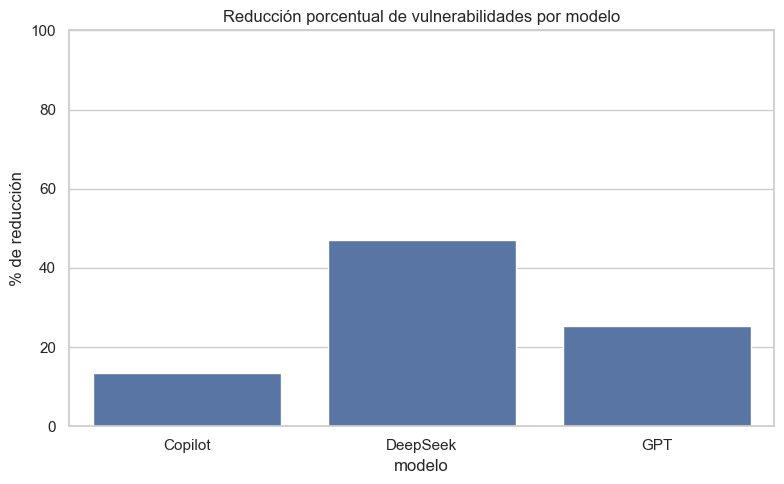

In [281]:
modelo_pivot['% reducción'] = ((modelo_pivot['inicial'] - modelo_pivot['correccion']) / modelo_pivot['inicial']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=modelo_pivot.index, y=modelo_pivot['% reducción'])
plt.title('Reducción porcentual de vulnerabilidades por modelo')
plt.ylabel('% de reducción')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


modelo deepseek tiene mayor tasa de reducción


# 6. Vulnerabilidades nuevas introducidas en la corrección


▶ Vulnerabilidades Nuevas Introducidas en la Corrección:
     modelo  vulnerabilidades_nuevas
0       GPT                       14
1   Copilot                        8
2  DeepSeek                       17


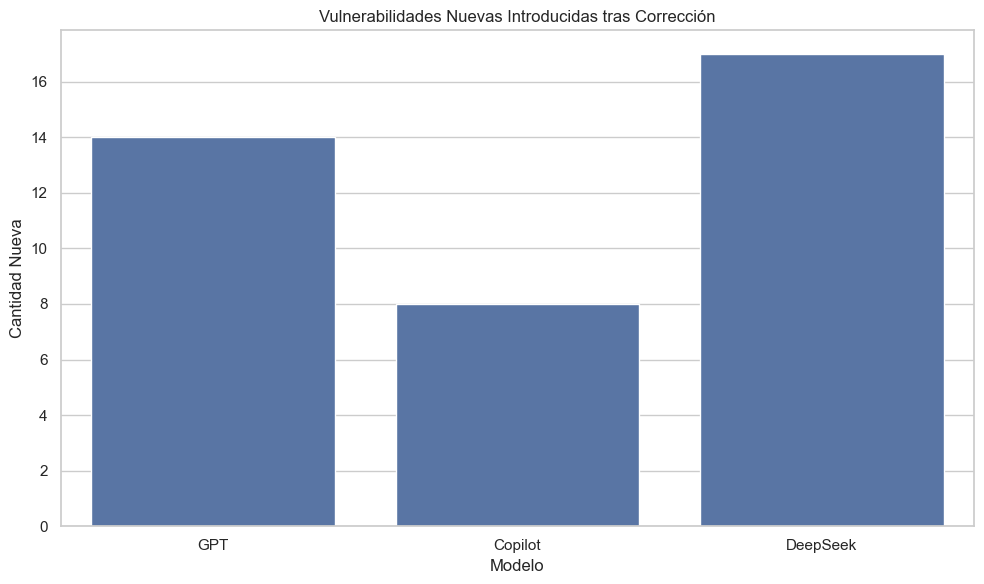

In [279]:

print("\n▶ Vulnerabilidades Nuevas Introducidas en la Corrección:")
print(vuln_nuevas)
plot_vulnerabilidades_nuevas(vuln_nuevas)


Copilot tiene menor cantidad de vulnerabilidades unicas

## (Evaluación Contextual)
1. Tipo de vulnerabilidades por contexto

2. ¿El modelo falla sistemáticamente en ciertas áreas como autenticación, criptografía o acceso?

Puedes agrupar CWE por categoría (ej. autenticación, validación, etc.).

3. Lenguaje de programación

Evalúa si el modelo se comporta mejor en Python que en C, por ejemplo (según tu columna Lenguaje).

4. Consistencia en la corrección

¿El modelo corrige siempre bien o solo algunos casos? ¿Responde con explicaciones coherentes o parches superficiales?

5. Cobertura de mitigación OWASP

Mide en cuántas categorías OWASP el modelo comete errores o mejora tras corrección.

6. Reintroducción de CWE antiguos en nuevos fragmentos

Verifica si hay patrones donde vuelve a cometer los mismos errores luego de corregir.

In [311]:
# Paso 1: Cantidad por OWASP y fase
conteo_owasp_fase = (
    df_combinado
    .groupby(['OWASP Top 10 (2021)', 'fase'])
    .size()
    .reset_index(name='cantidad_presente')
)

# Paso 2: Modelo más frecuente por OWASP y fase
modelo_owasp_fase = (
    df_combinado
    .groupby(['OWASP Top 10 (2021)', 'fase', 'modelo'])
    .size()
    .reset_index(name='cuenta')
    .sort_values(['OWASP Top 10 (2021)', 'fase', 'cuenta'], ascending=[True, True, False])
    .drop_duplicates(subset=['OWASP Top 10 (2021)', 'fase'])
    .rename(columns={'modelo': 'modelo_mas_frecuente'})
    .drop(columns='cuenta')
)

# Paso 3: Unir ambos
owasp_fase_final = pd.merge(conteo_owasp_fase, modelo_owasp_fase, on=['OWASP Top 10 (2021)', 'fase'])

# Renombrar columna para coherencia
owasp_fase_final = owasp_fase_final.rename(columns={'fase': 'fase_general'})

# Mostrar resultado
print("▶ Contexto OWASP por fase con cantidad y modelo dominante:")
(owasp_fase_final)


▶ Contexto OWASP por fase con cantidad y modelo dominante:


,OWASP Top 10 (2021),fase_general,cantidad_presente,modelo_mas_frecuente
0,A01:2021 - Broken Access Control,correccion,77,DeepSeek
1,A01:2021 - Broken Access Control,inicial,143,DeepSeek
2,A02:2021 - Cryptographic Failures,correccion,48,GPT
3,A02:2021 - Cryptographic Failures,inicial,65,DeepSeek
4,A03:2021 - Injection,correccion,24,Copilot
5,A03:2021 - Injection,inicial,53,DeepSeek
6,A04:2021 - Insecure Design,correccion,121,DeepSeek
7,A04:2021 - Insecure Design,inicial,142,DeepSeek
8,A05:2021 - Security Misconfiguration,correccion,65,Copilot
9,A05:2021 - Security Misconfiguration,inicial,100,DeepSeek


In [292]:
# Total de vulnerabilidades por modelo, lenguaje y fase, ordenado
vuln_totales_lenguaje = (
    df_combinado
    .groupby(['modelo', 'Lenguaje', 'fase'])
    .size()
    .reset_index(name='total_vulnerabilidades')
    .sort_values(by='total_vulnerabilidades', ascending=False)
)

# Vulnerabilidades únicas por modelo, lenguaje y fase, ordenado
cwe_unicos_lenguaje = (
    df_combinado
    .groupby(['modelo', 'Lenguaje', 'fase'])['CWE ID']
    .nunique()
    .reset_index(name='cwe_unicos')
    .sort_values(by='cwe_unicos', ascending=False)
)

# Tasa de corrección por modelo y lenguaje
def tasa_correccion_por_lenguaje(df_generado, df_correccion):
    resultados = []
    modelos = df_generado['modelo'].unique()
    lenguajes = df_generado['Lenguaje'].unique()

    for modelo in modelos:
        for lenguaje in lenguajes:
            iniciales = set(df_generado[(df_generado['modelo'] == modelo) & (df_generado['Lenguaje'] == lenguaje)]['CWE ID'])
            corregidos = set(df_correccion[(df_correccion['modelo'] == modelo) & (df_correccion['Lenguaje'] == lenguaje)]['CWE ID'])
            corregidos_exitosos = iniciales - corregidos
            tasa = (len(corregidos_exitosos) / len(iniciales) * 100) if iniciales else 0
            resultados.append({
                'modelo': modelo,
                'Lenguaje': lenguaje,
                'tasa_correccion(%)': round(tasa, 2),
                'cwe_iniciales': len(iniciales)
            })

    return pd.DataFrame(resultados).sort_values(by='cwe_iniciales', ascending=False)

# Ejecutar
tasa_corr_lenguaje = tasa_correccion_por_lenguaje(df_generado, df_correccion)




In [293]:
# Mostrar resultados
print("▶ Total de vulnerabilidades por modelo, lenguaje y fase (ordenado):")
print(vuln_totales_lenguaje)



▶ Total de vulnerabilidades por modelo, lenguaje y fase (ordenado):
      modelo Lenguaje        fase  total_vulnerabilidades
7   DeepSeek   Python     inicial                     141
5   DeepSeek        C     inicial                     136
1    Copilot        C     inicial                      88
11       GPT   Python     inicial                      83
9        GPT        C     inicial                      79
0    Copilot        C  correccion                      76
3    Copilot   Python     inicial                      76
6   DeepSeek   Python  correccion                      74
4   DeepSeek        C  correccion                      73
2    Copilot   Python  correccion                      66
8        GPT        C  correccion                      63
10       GPT   Python  correccion                      58


In [294]:
print("\n▶ CWE únicos por modelo, lenguaje y fase (ordenado):")
print(cwe_unicos_lenguaje)



▶ CWE únicos por modelo, lenguaje y fase (ordenado):
      modelo Lenguaje        fase  cwe_unicos
7   DeepSeek   Python     inicial          54
5   DeepSeek        C     inicial          54
6   DeepSeek   Python  correccion          47
3    Copilot   Python     inicial          46
2    Copilot   Python  correccion          39
11       GPT   Python     inicial          39
1    Copilot        C     inicial          36
10       GPT   Python  correccion          32
9        GPT        C     inicial          32
4   DeepSeek        C  correccion          26
0    Copilot        C  correccion          25
8        GPT        C  correccion          24


In [295]:

print("\n▶ Tasa de corrección por modelo y lenguaje (ordenado por CWE iniciales):")
print(tasa_corr_lenguaje)


▶ Tasa de corrección por modelo y lenguaje (ordenado por CWE iniciales):
     modelo Lenguaje  tasa_correccion(%)  cwe_iniciales
4  DeepSeek   Python               57.41             54
5  DeepSeek        C               57.41             54
2   Copilot   Python               28.26             46
0       GPT   Python               46.15             39
3   Copilot        C               38.89             36
1       GPT        C               53.12             32


In [301]:
# CWE únicos por modelo, Caso y Lenguaje antes de la corrección
cwe_por_caso_generado = (
    df_generado.groupby(['modelo', 'Caso', 'Lenguaje'])['CWE ID']
    .nunique()
    .reset_index(name='cwe_iniciales')
)

# CWE únicos por modelo, Caso y Lenguaje después de la corrección
cwe_por_caso_correccion = (
    df_correccion.groupby(['modelo', 'Caso', 'Lenguaje'])['CWE ID']
    .nunique()
    .reset_index(name='cwe_despues')
)

# Combinar ambos DataFrames
comparacion_casos = pd.merge(
    cwe_por_caso_generado,
    cwe_por_caso_correccion,
    on=['modelo', 'Caso', 'Lenguaje'],
    how='left'
)

# Calcular tasa de corrección por caso
comparacion_casos['tasa_correccion_por_caso'] = (
    100 * (1 - comparacion_casos['cwe_despues'] / comparacion_casos['cwe_iniciales'])
).round(2)

# Si no hay vulnerabilidades en la corrección, asignar tasa 100%
comparacion_casos['tasa_correccion_por_caso'] = comparacion_casos['tasa_correccion_por_caso'].fillna(100.0)

# Mostrar resultados ordenados por tasa de corrección descendente
comparacion_casos_ordenado = comparacion_casos.sort_values(by='tasa_correccion_por_caso', ascending=False)

print("▶ Tasa de corrección por Caso, modelo y lenguaje:")
comparacion_casos_ordenado.head(20)


▶ Tasa de corrección por Caso, modelo y lenguaje:


,modelo,Caso,Lenguaje,cwe_iniciales,cwe_despues,tasa_correccion_por_caso
38,DeepSeek,9,Python,10,1,90.00
36,DeepSeek,7,Python,10,2,80.00
40,DeepSeek,11,Python,9,2,77.78
71,GPT,12,Python,4,1,75.00
16,Copilot,17,C,14,4,71.43
48,DeepSeek,19,C,10,3,70.00
46,DeepSeek,17,C,10,3,70.00
47,DeepSeek,18,C,10,3,70.00
50,DeepSeek,21,Python,9,3,66.67
0,Copilot,1,Python,5,2,60.00


In [285]:
owasp_antes = df_generado.groupby('modelo')['OWASP Top 10 (2021)'].nunique().reset_index(name='owasp_inicial')
owasp_despues = df_correccion.groupby('modelo')['OWASP Top 10 (2021)'].nunique().reset_index(name='owasp_despues')
cobertura = pd.merge(owasp_antes, owasp_despues, on='modelo')
cobertura['reducción_categorías'] = cobertura['owasp_inicial'] - cobertura['owasp_despues']
cobertura['% reducción'] = (cobertura['reducción_categorías'] / cobertura['owasp_inicial']) * 100
print("\n▶ Cobertura de categorías OWASP por modelo:")
print(cobertura[['modelo', 'owasp_inicial', 'owasp_despues', 'reducción_categorías', '% reducción']])


▶ Cobertura de categorías OWASP por modelo:
     modelo  owasp_inicial  owasp_despues  reducción_categorías  % reducción
0   Copilot              9              9                     0          0.0
1  DeepSeek             10             11                    -1        -10.0
2       GPT             10              9                     1         10.0


In [284]:
reintroduccion_resultado = []
for modelo in df_generado['modelo'].unique():
    cwe_ini = set(df_generado[df_generado['modelo'] == modelo]['CWE ID'])
    cwe_corr = set(df_correccion[df_correccion['modelo'] == modelo]['CWE ID'])
    cwe_corregidos = cwe_ini - cwe_corr
    cwe_reintroducidos = cwe_corregidos.intersection(df_correccion['CWE ID'].values)
    
    reintroduccion_resultado.append({
        'modelo': modelo,
        'cwe_corregidos': len(cwe_corregidos),
        'cwe_reintroducidos': len(cwe_reintroducidos),
        '% reintroduccion': round(len(cwe_reintroducidos) / len(cwe_corregidos) * 100, 2) if cwe_corregidos else 0
    })
df_reintroduccion = pd.DataFrame(reintroduccion_resultado)
print("\n▶ Reintroducción de Vulnerabilidades tras Corrección:")
print(df_reintroduccion)



▶ Reintroducción de Vulnerabilidades tras Corrección:
     modelo  cwe_corregidos  cwe_reintroducidos  % reintroduccion
0       GPT              23                  10             43.48
1   Copilot              12                   6             50.00
2  DeepSeek              24                   8             33.33


## Conclusiones Generales sobre Lenguajes (Python vs. C)
1. Volumen total de vulnerabilidades es similar en ambos lenguajes
Python: 300 vulnerabilidades generadas en total.

C: 303 vulnerabilidades generadas.

Los modelos tienden a generar un número comparable de vulnerabilidades sin importar el lenguaje.

2. Python muestra una mayor reducción en cantidad total de vulnerabilidades
Python: Redujo 102 vulnerabilidades → 34.00% de reducción.

C: Redujo 91 vulnerabilidades → 30.03% de reducción.

En términos de volumen, los modelos fueron ligeramente más eficaces corrigiendo código Python.

3. C tiene mejor desempeño en corrección de tipos distintos de vulnerabilidades (CWE únicos)
Python: Reducción de 21 CWE únicos → 15.11% de reducción.

C: Reducción de 47 CWE únicos → 38.52% de reducción.

En C, los modelos eliminaron una mayor diversidad de errores, lo que indica mayor profundidad de corrección estructural.

4. Los modelos corrigen mejor errores en C cuando se trata de diversidad, pero mejor en Python cuando se trata de volumen
C: Corrigen más tipos distintos de errores (más efectiva en cobertura de categorías).

Python: Corrigen más instancias repetidas de errores, pero varios tipos siguen presentes.

5. Razón técnica probable
En C, los errores tienden a ser más explícitos (uso de funciones peligrosas, errores de memoria) y son más fácilmente detectables y corregibles por patrones.

En Python, las vulnerabilidades dependen más del flujo lógico y semántico, lo que requiere mayor comprensión contextual que los modelos aún no manejan del todo bien.

El lenguaje de programación influye directamente en la calidad y efectividad de la corrección de vulnerabilidades por parte de los modelos LLM. Mientras que en Python se logra una mayor reducción en volumen total, el código en C muestra una corrección más efectiva en cuanto a la diversidad de errores corregidos. Esto sugiere que los modelos actuales responden mejor a patrones estructurados presentes en C, y tienen más dificultad abordando errores lógicos y semánticos más típicos de Python.



## encuanto a owasp
Las categorías OWASP Top 10 (2021) se mantienen ampliamente presentes después de la corrección automática, lo que revela limitaciones importantes en la capacidad de los modelos LLM para eliminar clases completas de riesgos. Aunque algunas categorías como Injection (A03) y Broken Access Control (A01) muestran reducciones significativas, otras como Logging (A09) y SSRF (A10) apenas se ven afectadas. Esto sugiere que las correcciones tienden a ser parciales y centradas en patrones evidentes, sin una comprensión completa del contexto de seguridad